In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [176]:
# 환경설정
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [17]:
# 데이터 불러오기
train = pd.read_csv('data/train.csv').set_index('index')
test_x = pd.read_csv('data/test_x.csv').set_index('index')
sample_submission = pd.read_csv('data/sample_submission.csv').set_index('index')

* Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
 - 대부분의 범죄자들과 다른 사람들의 가장 큰 차이점은 범죄자들은 잡힐 만큼 어리석다는 것이다.
* Qc : Anyone who completely trusts anyone else is asking for trouble.
 - 다른 사람을 너무 믿는 사람은 문제를 스스로 자초하는 것이다.
* Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
 - P.T. Barnum(미국 정치인)은 매 순간 어리버리가 태어난다고 했는데 그것은 틀렸다.
* Qf : There is no excuse for lying to someone else.
 - 거짓말 하는 것은 변명의 여지가 없다.
* Qh : Most people forget more easily the death of their parents than the loss of their property.
 - 대부분 사람들은 재산상 손해를 입는 것보다 부모의 죽음을 더 쉽게 잊는다.
* Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
 - 모든 사람들은 악랄한 기질을 가지고 있으며, 기회가 되면 그 기질이 나타난다 보는게 맞다.
* Qk : All in all, it is better to be humble and honest than to be important and dishonest.
 - 대체로, 거만하거나 부정직한 것보다는 겸손하고 정직한 것이 낫다.
* Qm : It is hard to get ahead without cutting corners here and there.
 - 돈을 아끼지 않고서는 출세하기 어렵다.
* Qo : The best way to handle people is to tell them what they want to hear.
 - 사람들 다루는 가장 좋은 방법은 그들이 듣고 싶은 말을 하는 것이다.
* Qq : Most people are basically good and kind.
 - 대부분의 사람들은 기본적으로 착하고 친절하다.
* Qr : One should take action only when sure it is morally right.
 - 도덕적으로 옳다고 확실이 들 때만 행동을 취해야 한다.
* Qs : It is wise to flatter important people.
 - 중요한 사람들에게 아첨하는 것이 현명하다.

In [31]:
print(f'Columns: {train.columns}')

Columns: Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')


In [255]:
train_prep.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       '연령군', '교육수준', '영어모국어여부', '가족수', '성별', '손잡이구분', '결혼여부', '인종', '종교',
       'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09',
       'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02',
       'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10',
       'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [256]:
# 전처리
# 일부 컬럼 영한 번역
train_prep = train.copy()
train_prep = train_prep.rename(columns={'age_group': '연령군',
    'education': '교육수준', 'familysize': '가족수', 'gender': '성별',
    'hand': '손잡이구분', 'married': '결혼여부', 'race': '인종', 
    'engnat': '영어모국어여부', 'religion': '종교', 'urban': '유년기거주지'})

In [228]:
def cnt_by_column(data, column_name, order=None):
    df = data.groupby(column_name).size()
    if order != None:
        df = df.loc[order]
    df = df.reset_index(name='건수')

    fig, ax = plt.subplots(figsize=(12, 5))
    sns.barplot(x=column_name, y='건수', data=df, ax=ax)
    plt.show()
    return df.set_index(column_name).T

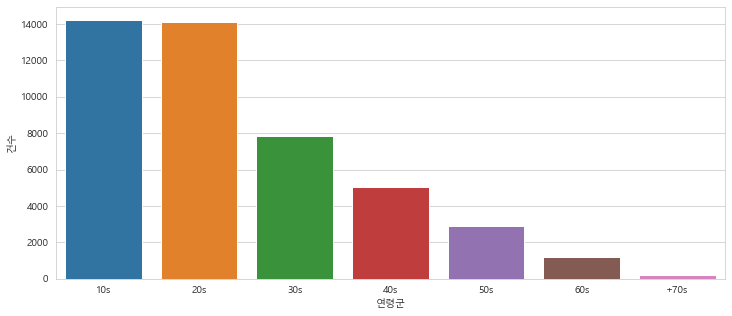

연령군,10s,20s,30s,40s,50s,60s,+70s
건수,14215,14112,7836,5051,2889,1194,235


In [229]:
# 연령군별 데이터 건수
cnt_by_column(train_prep, '연령군', ['10s', '20s', '30s', '40s', '50s', '60s', '+70s'])

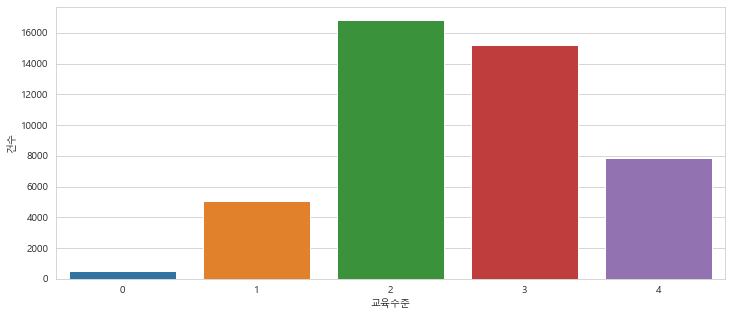

교육수준,0,1,2,3,4
건수,528,5088,16835,15227,7854


In [261]:
# 교욱수준별 데이터 건수
cnt_by_column(train_prep, '교육수준')

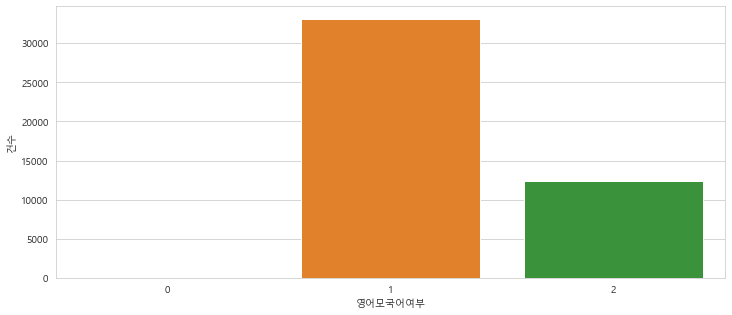

영어모국어여부,0,1,2
건수,77,33024,12431


In [260]:
# 교욱수준별 데이터 건수
cnt_by_column(train_prep, '영어모국어여부')

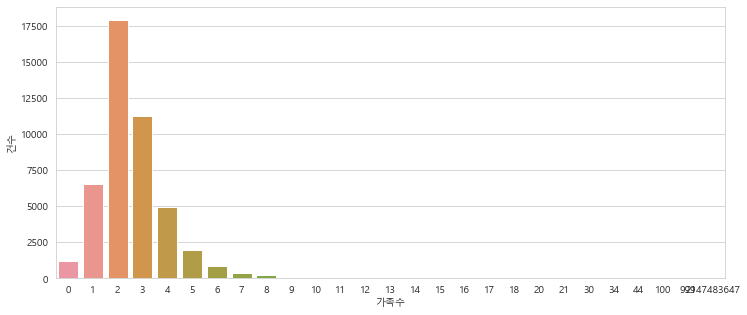

가족수,0,1,2,3,4,5,6,7,8,9,...,17,18,20,21,30,34,44,100,999,2147483647
건수,1217,6535,17918,11256,4907,1962,838,387,221,126,...,3,1,2,2,1,1,3,1,1,1


In [238]:
# 교욱수준별 데이터 건수
cnt_by_column(train_prep, '가족수')

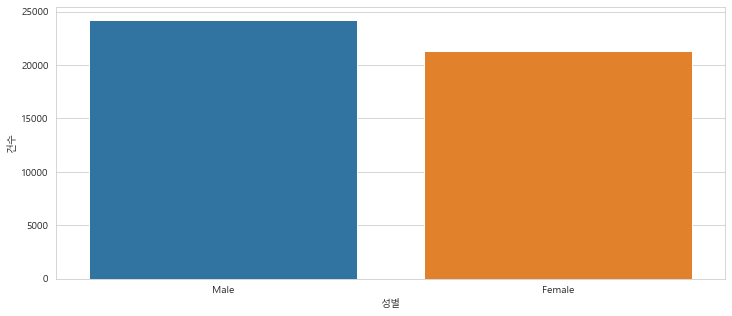

성별,Male,Female
건수,24217,21315


In [246]:
cnt_by_column(train_prep, '성별', ['Male', 'Female'])

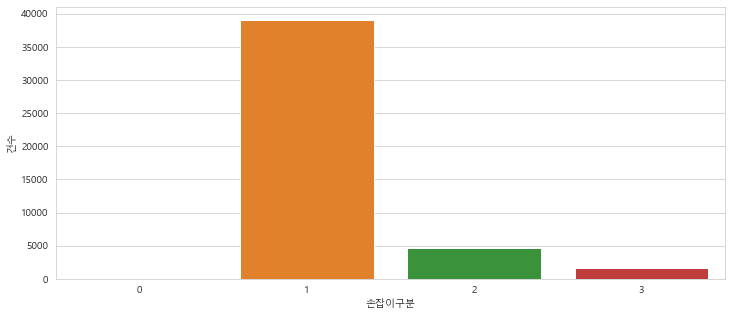

손잡이구분,0,1,2,3
건수,161,39058,4692,1621


In [259]:
cnt_by_column(train_prep, '손잡이구분')

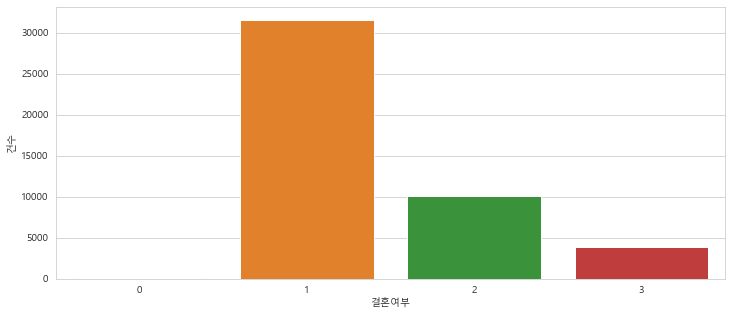

결혼여부,0,1,2,3
건수,93,31550,10059,3830


In [258]:
cnt_by_column(train_prep, '결혼여부')

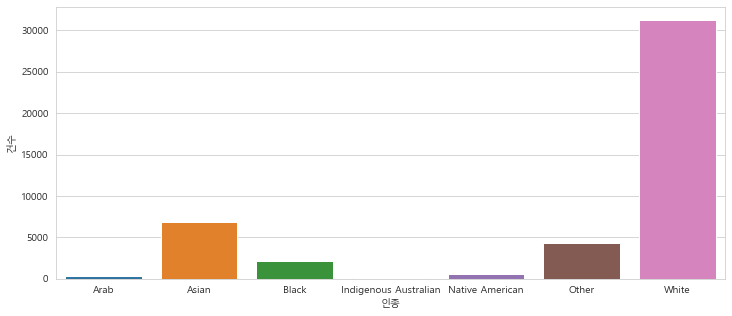

인종,Arab,Asian,Black,Indigenous Australian,Native American,Other,White
건수,351,6834,2168,53,548,4330,31248


In [251]:
cnt_by_column(train_prep, '인종')

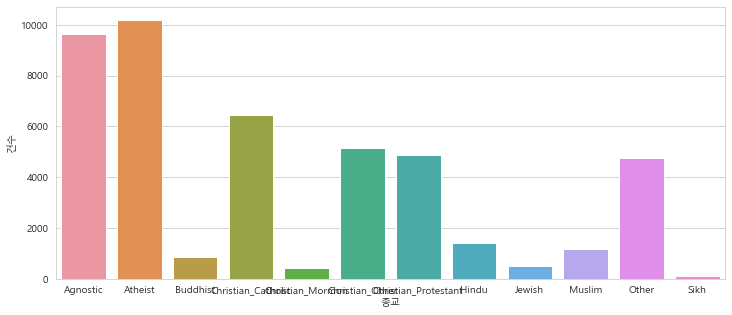

종교,Agnostic,Atheist,Buddhist,Christian_Catholic,Christian_Mormon,Christian_Other,Christian_Protestant,Hindu,Jewish,Muslim,Other,Sikh
건수,9624,10192,850,6431,428,5137,4875,1429,487,1192,4770,117


In [252]:
cnt_by_column(train_prep, '종교')

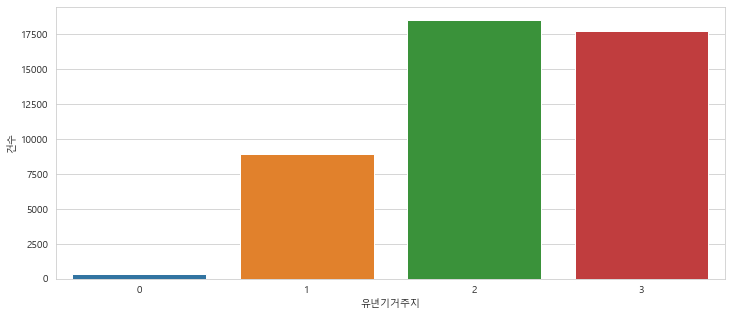

유년기거주지,0,1,2,3
건수,322,8909,18534,17767


In [257]:
cnt_by_column(train_prep, '유년기거주지')